## Data Preparation 

We have observed that our dataset is extremely imbalanced by doing various operations detailed in the data_munging python notebook. Now we will solely focus on the data preparation part so that we can have a better model accuracy.

First we will fetch the work from the "data_munging" notebook so that we can avoid doing that work all over again. 

In [59]:
import import_ipynb
import data_munging

First we will go for feature selection in order to remove redundant features from the data. We will use the RandomForestClassifer model to see the importance of each feature in reducing the impurity of a split which indirectly shows how important it is to the prediction.  

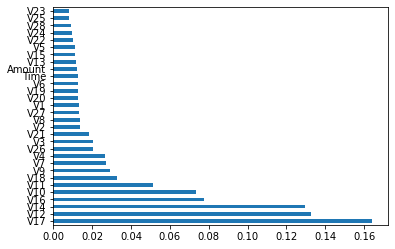

In [60]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np 

np.random.seed(42)

X = df.drop('Class', axis=1)
y = df['Class']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
df_feature_importances = feat_importances.nlargest(30)
df_feature_importances.plot(kind='barh')
plt.show()

We can see that 15 features could be enough for our purposes from the above horizontal bar chart. 

In [74]:
str_list = df_feature_importances.index
str_list = str_list.to_list()[:15]
X = df.loc[:, str_list]
X.columns

Index(['V17', 'V12', 'V14', 'V16', 'V10', 'V11', 'V18', 'V9', 'V7', 'V4',
       'V26', 'V3', 'V21', 'V2', 'V8'],
      dtype='object')

With the feature selection done, we will now split the data into training and test sets.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

We know that there are a large number of non fraudulent transaction related records and only a few fraudulent ones.<br/>
In order to prevent loss of information, we would first try oversampling the minority class. For this we would be using the SMOTE technique. 

Note: The train test data split should be done before the oversampling so as to avoid "bleeding" of information from the validation set. If this were to happen, our model would face the problem of overfitting and would not be able to generalize well. 

In [84]:
from imblearn.over_sampling import SMOTE


sm = SMOTE(random_state=42)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train) 
print("Size before sampling for X_train: ", X_train.shape)
print("Size after sampling for X_train: ", X_train_smote.shape)
print("Size before sampling for y_train: ", y_train.shape)
print("Size after sampling for X_train: ", y_train_smote.shape)

Size before sampling for X_train:  (190820, 15)
Size after sampling for X_train:  (380954, 15)
Size before sampling for y_train:  (190820,)
Size after sampling for X_train:  (380954,)


In [82]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
print("Size before sampling for X_train: ", X_train.shape)
print("Size after sampling for X_train: ", X_train_adasyn.shape)
print("Size before sampling for y_train: ", y_train.shape)
print("Size after sampling for X_train: ", y_train_adasyn.shape)

Size before sampling for X_train:  (190820, 15)
Size after sampling for X_train:  (380961, 15)
Size before sampling for y_train:  (190820,)
Size after sampling for X_train:  (380961,)


In [85]:
%store X_train_smote
%store y_train_smote
%store X_train_adasyn
%store y_train_adasyn 
%store X_train 
%store y_train
%store X_test
%store y_test

Stored 'X_train_smote' (DataFrame)
Stored 'y_train_smote' (Series)
Stored 'X_train_adasyn' (DataFrame)
Stored 'y_train_adasyn' (Series)
Stored 'X_train' (DataFrame)
Stored 'y_train' (Series)
Stored 'X_test' (DataFrame)
Stored 'y_test' (Series)
